In [1]:
import numpy as np
import pandas as pd
# import talib as ta
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA
from numpy import linalg as LA
from tqdm import *
import math as math


In [2]:
df = pd.read_excel('2021-01-29(102000886.IB).xls')
# del df['Unnamed: 0']

In [3]:
# data processing

In [4]:
df.head()

,时间,可信度,待偿年限,日间估价全价,日间应计利息,估价净价,估价收益率(%),剩余本金,估价修正久期,估价凸性,估价基点价值,日终估价全价,日终应计利息
0,2021-01-28,推荐,2.2466,99.0995,2.2377,96.8618,4.4632,100.0,2.0667,6.3771,0.0205,99.1076,2.2458
1,2021-01-27,推荐,2.2493,99.1167,2.2295,96.8872,4.4490,100.0,2.0696,6.3922,0.0205,99.1249,2.2377
2,2021-01-26,推荐,2.2521,99.1574,2.2214,96.9360,4.4235,100.0,2.0727,6.4088,0.0206,99.1655,2.2295
3,2021-01-25,推荐,2.2548,99.1514,2.2133,96.9382,4.4207,100.0,2.0754,6.4226,0.0206,99.1596,2.2214
4,2021-01-22,推荐,2.2630,99.0068,2.1888,96.8180,4.4737,100.0,2.0822,6.4561,0.0206,99.0150,2.1970


In [5]:
df = df.dropna(how='any')

In [6]:
df = df.sort_values(by='时间')

In [7]:
df['可信度'].unique().tolist()

['推荐']

In [8]:
df.columns

Index(['时间', '可信度', '待偿年限', '日间估价全价', '日间应计利息', '估价净价', '估价收益率(%)', '剩余本金',
       '估价修正久期', '估价凸性', '估价基点价值', '日终估价全价', '日终应计利息'],
      dtype='object')

In [9]:
choose_factor = [i for i in df.columns if i not in ['可信度','日终估价全价','剩余本金','日终应计利息','时间']]

In [10]:
choose_feature = df[choose_factor]

In [11]:
choose_feature

,待偿年限,日间估价全价,日间应计利息,估价净价,估价收益率(%),估价修正久期,估价凸性,估价基点价值
188,2.9973,100.0643,0.0081,100.0562,2.9501,2.8282,10.8739,0.0283
187,2.9945,100.1350,0.0163,100.1187,2.9279,2.8261,10.8611,0.0283
186,2.9781,100.1375,0.0651,100.0724,2.9439,2.8097,10.7521,0.0281
185,2.9753,99.9958,0.0732,99.9226,2.9972,2.8055,10.7231,0.0281
184,2.9726,99.7403,0.0814,99.6590,3.0914,2.8002,10.6855,0.0279
...,...,...,...,...,...,...,...,...
4,2.2630,99.0068,2.1888,96.8180,4.4737,2.0822,6.4561,0.0206
3,2.2548,99.1514,2.2133,96.9382,4.4207,2.0754,6.4226,0.0206
2,2.2521,99.1574,2.2214,96.9360,4.4235,2.0727,6.4088,0.0206
1,2.2493,99.1167,2.2295,96.8872,4.4490,2.0696,6.3922,0.0205


In [12]:
choose_label = df['日终估价全价']

In [13]:
#Separate the data for training and test sets

In [14]:
X_train = choose_feature.head(150)
y_train = choose_label.head(150)
X_test = choose_feature.tail(120)
y_test = choose_label.tail(120)

In [15]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def dataPlot():
    '''
    基于相关性系数计算结果来绘制
    '''
    fig,ax=plt.subplots(figsize=(18,8))
#     key_list=['A','B','C','D','E','F','G','H']
    sns.heatmap(pd.DataFrame(np.round(X_train[choose_factor].corr(),4),columns=choose_factor,index=choose_factor),annot=True,vmax=1,vmin=0,xticklabels=True,
                             yticklabels=True,square=True,cmap="YlGnBu")
    ax.set_title(' 影响度前十因子相关性 ', fontsize=18)
    ax.set_ylabel('Y', fontsize=16)
    ax.set_xlabel('X', fontsize=16)

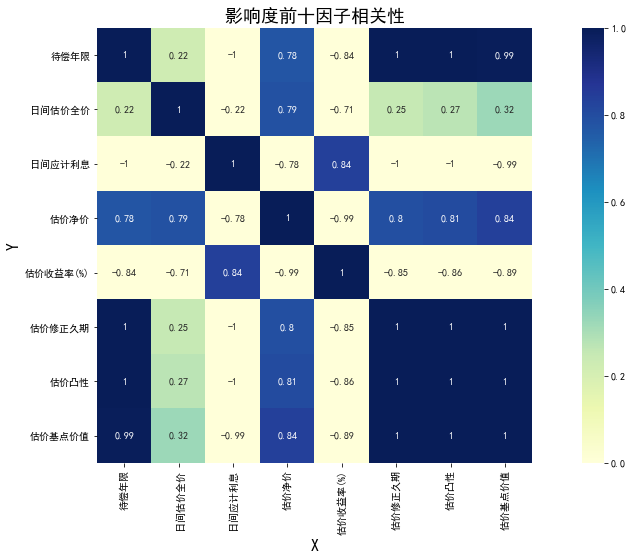

In [16]:
dataPlot()

In [17]:
import xgboost as xgb 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [18]:
#Introduce random forest model

In [19]:
# from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [20]:
print(np.isnan(choose_feature).any())

待偿年限        False
日间估价全价      False
日间应计利息      False
估价净价        False
估价收益率(%)    False
估价修正久期      False
估价凸性        False
估价基点价值      False
dtype: bool


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a random forest to solve regression problems
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate regression performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.005657366666644729
Mean Squared Error: 9.25827092540185e-05
Root Mean Squared Error: 0.009621990919452091


In [22]:
plots = pd.DataFrame(y_pred,y_test).reset_index()

In [23]:
plots.columns = ['predict','true']

In [24]:
plots.index = df['时间'].tail(120)

In [25]:
plots

,predict,true
时间,,
2020-08-07,98.5026,98.501356
2020-08-10,98.5621,98.562983
2020-08-11,98.6071,98.606154
2020-08-12,98.6597,98.656288
2020-08-13,98.6971,98.696357
...,...,...
2021-01-22,99.0150,99.021488
2021-01-25,99.1596,99.163054
2021-01-26,99.1655,99.163953


array([<AxesSubplot:xlabel='时间'>, <AxesSubplot:xlabel='时间'>], dtype=object)

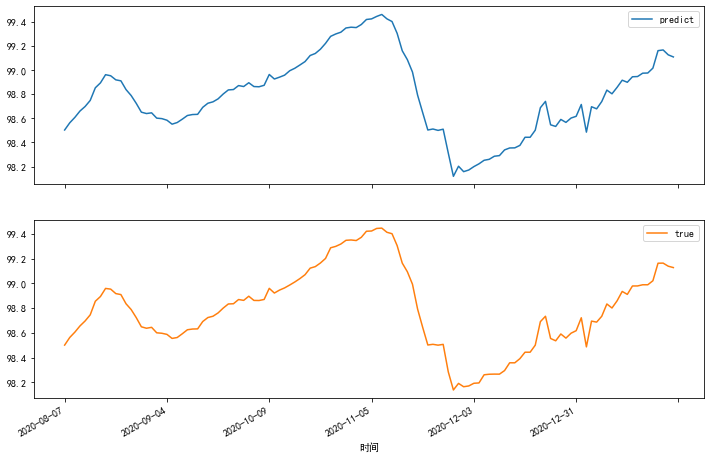

In [26]:
plots.plot(figsize=(12,8),subplots=True)

In [27]:
#View the importance of factors

In [28]:
# View features
importances = regressor.feature_importances_ 
importances_df = pd.DataFrame([choose_factor, importances], index=['Features', 'Importances']).T
importances_df.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
1,日间估价全价,0.934742
4,估价收益率(%),0.0118599
2,日间应计利息,0.0109272
3,估价净价,0.00986669
0,待偿年限,0.00973225
6,估价凸性,0.00899281
5,估价修正久期,0.00720551
7,估价基点价值,0.00667415


In [29]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:title={'center':'因子重要性排序'}, xlabel='Features'>

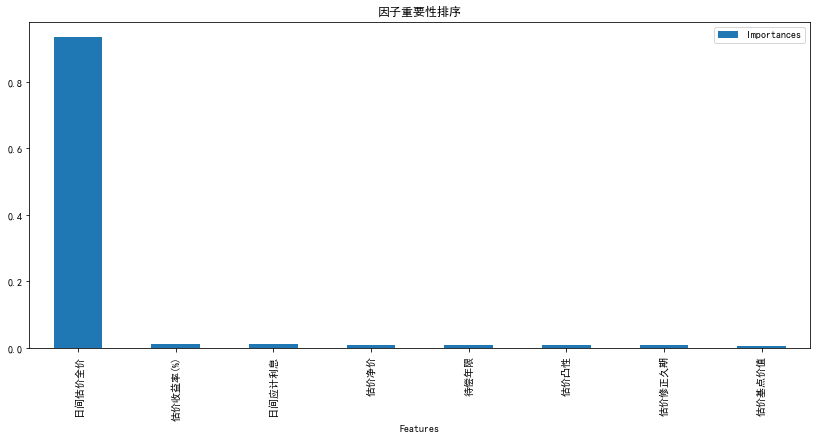

In [30]:
importances_df.set_index('Features').sort_values(by='Importances',ascending=False).head(10).plot.bar(figsize=(14,6),title='因子重要性排序')